In [1]:
#import needed libraries & float format definition

# import unicodecsv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

pd.options.display.float_format = '{:.2f}'.format
# Reading and showing head data
flights = pd.read_csv("flights.csv")
flights.head(100)

c:\Users\neelk\anaconda3\envs\cis545\lib\site-packages\IPython\core\interactiveshell.py:3186: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.00,-22.00,0,0,NaN,nan,nan,nan,nan,nan
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.00,-9.00,0,0,NaN,nan,nan,nan,nan,nan
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.00,5.00,0,0,NaN,nan,nan,nan,nan,nan
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.00,-9.00,0,0,NaN,nan,nan,nan,nan,nan
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.00,-21.00,0,0,NaN,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2015,1,1,4,B6,2001,N358JB,BUF,JFK,535,...,648.00,-15.00,0,0,NaN,nan,nan,nan,nan,nan
96,2015,1,1,4,B6,2807,N190JB,PWM,JFK,535,...,635.00,-25.00,0,0,NaN,nan,nan,nan,nan,nan
97,2015,1,1,4,B6,2023,N324JB,JFK,SJU,535,...,1039.00,19.00,0,0,NaN,0.00,0.00,19.00,0.00,0.00
98,2015,1,1,4,EV,4557,N12967,CRP,IAH,535,...,615.00,-21.00,0,0,NaN,nan,nan,nan,nan,nan


In [3]:
flights[:100].to_csv('temp_dat.csv')

In [2]:
flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.00,5819079.00,5819079.00,5819079.00,5819079.00,5819079.00,5732926.00,5732926.00,5730032.00,5730032.00,...,5819079.00,5726566.00,5714008.00,5819079.00,5819079.00,1063439.00,1063439.00,1063439.00,1063439.00,1063439.00
mean,2015.00,6.52,15.70,3.93,2173.09,1329.60,1335.20,9.37,16.07,1357.17,...,1493.81,1476.49,4.41,0.00,0.02,13.48,0.08,18.97,23.47,2.92
std,0.00,3.41,8.78,1.99,1757.06,483.75,496.42,37.08,8.90,498.01,...,507.16,526.32,39.27,0.05,0.12,28.00,2.14,48.16,43.20,20.43
min,2015.00,1.00,1.00,1.00,1.00,1.00,1.00,-82.00,1.00,1.00,...,1.00,1.00,-87.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2015.00,4.00,8.00,2.00,730.00,917.00,921.00,-5.00,11.00,935.00,...,1110.00,1059.00,-13.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2015.00,7.00,16.00,4.00,1690.00,1325.00,1330.00,-2.00,14.00,1343.00,...,1520.00,1512.00,-5.00,0.00,0.00,2.00,0.00,2.00,3.00,0.00
75%,2015.00,9.00,23.00,6.00,3230.00,1730.00,1740.00,7.00,19.00,1754.00,...,1918.00,1917.00,8.00,0.00,0.00,18.00,0.00,19.00,29.00,0.00
max,2015.00,12.00,31.00,7.00,9855.00,2359.00,2400.00,1988.00,225.00,2400.00,...,2400.00,2400.00,1971.00,1.00,1.00,1134.00,573.00,1971.00,1331.00,1211.00


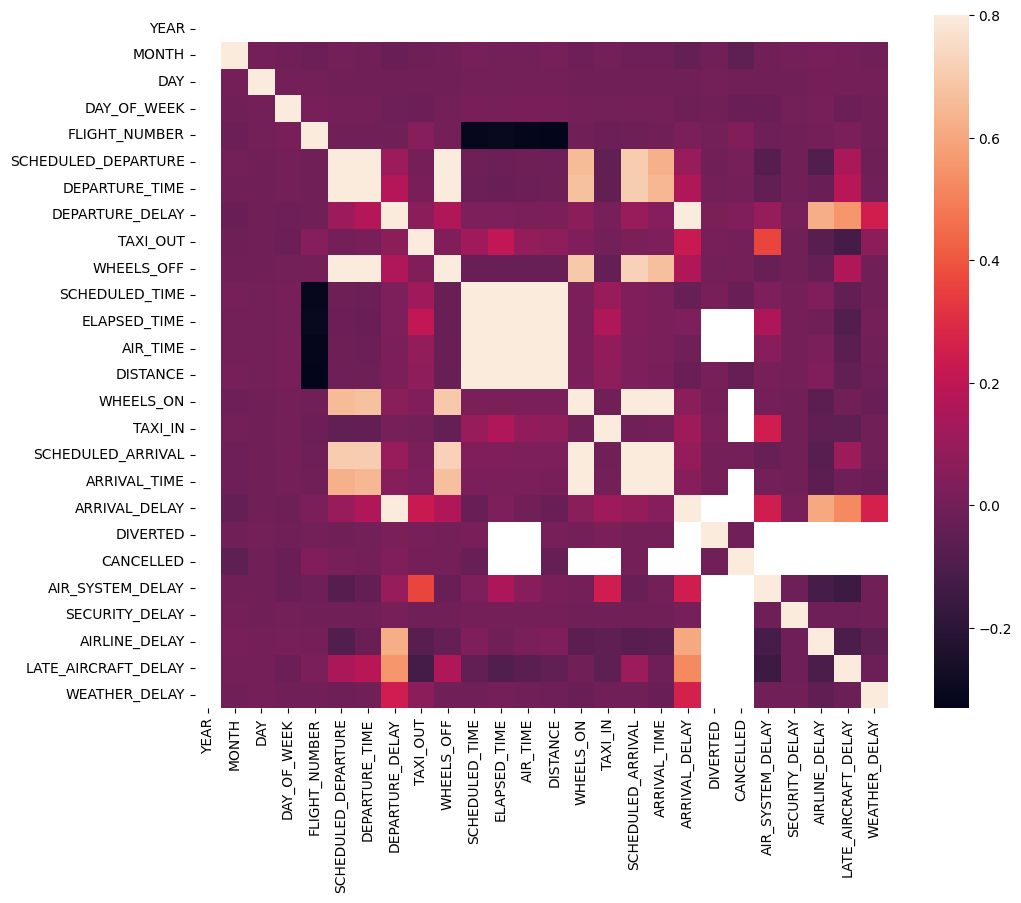

In [3]:
#correlation matrix
corrmat = flights.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

In [9]:
# creating new variables and renaming 
flights['DepDate'] = pd.to_datetime(flights.YEAR*10000+flights.MONTH*100+flights.DAY,format='%Y%m%d')

#Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)
for dataset in flights:
    flights.loc[flights['ARRIVAL_DELAY'] <= 15, 'Status'] = 0
    flights.loc[flights['ARRIVAL_DELAY'] >= 15, 'Status'] = 1
    flights.loc[flights['ARRIVAL_DELAY'] >= 60, 'Status'] = 2
    flights.loc[flights['DIVERTED'] == 1, 'Status'] = 3
    flights.loc[flights['CANCELLED'] == 1, 'Status'] = 4
    
    
# #Cancellation cause

flights.loc[flights["CANCELLATION_REASON"] =="A", 'CANCELLATION_REASON'] = "0"
flights.loc[flights["CANCELLATION_REASON"] =="B", 'CANCELLATION_REASON'] = "1"
flights.loc[flights["CANCELLATION_REASON"] =="C", 'CANCELLATION_REASON'] = "2"

# dropping the unwanted data   
# flights = flights.drop("Unnamed: 0",1) #Empty
# flights = flights.drop("YEAR",1) #Converted to date
# flights = flights.drop("DAY",1) #Converted to date
# flights = flights.drop("DAY_OF_WEEK",1) #Of the departure data we only keep the expected 
# flights = flights.drop("DepDelay",1)
# flights = flights.drop("ArrTime",1)
# flights = flights.drop("CRSArrTime",1)
# flights = flights.drop("ActualElapsedTime",1)
# flights = flights.drop("CRSElapsedTime",1)
# flights = flights.drop("Diverted",1)
# flights = flights.drop("Cancelled",1)
# flights = flights.drop("Distance",1)
# flights = flights.drop("FlightNum",1)
# flights = flights.drop("TailNum",1)
# flights = flights.drop("DEPARTURE_DELAY", 1)
# flights = flights.drop("ARRIVAL_TIME", 1)
# flights = flights.drop("SCHEDULED_ARRIVAL", 1)
# flights = flights.drop("FLIGHT_NUMBER", 1)
# flights = flights.drop("TAIL_NUMBER", 1)

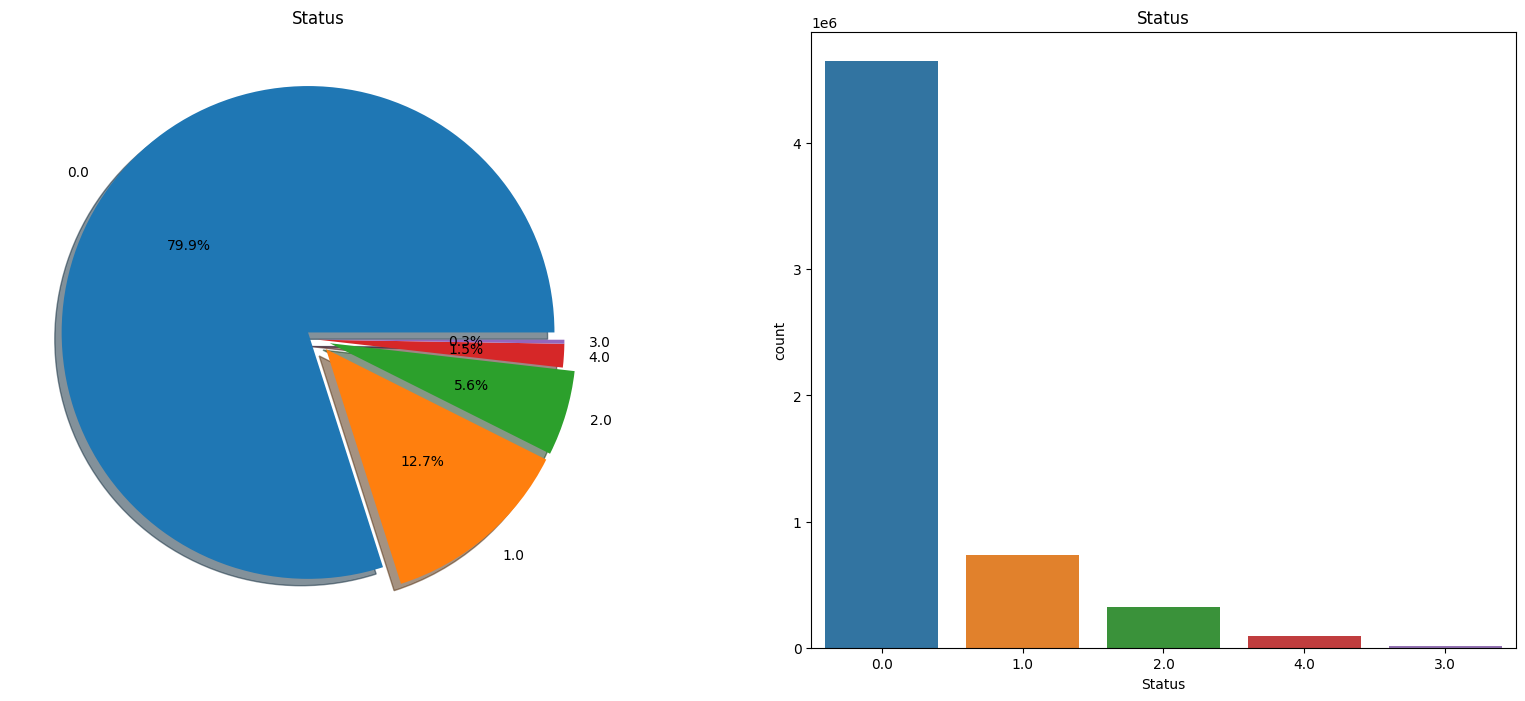

Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)


In [10]:
f,ax=plt.subplots(1,2,figsize=(20,8))
flights['Status'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0,0],autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Status')
ax[0].set_ylabel('')
sns.countplot(x='Status',order = flights['Status'].value_counts().index, data=flights,ax=ax[1])
ax[1].set_title('Status')
plt.show()

print('Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)')

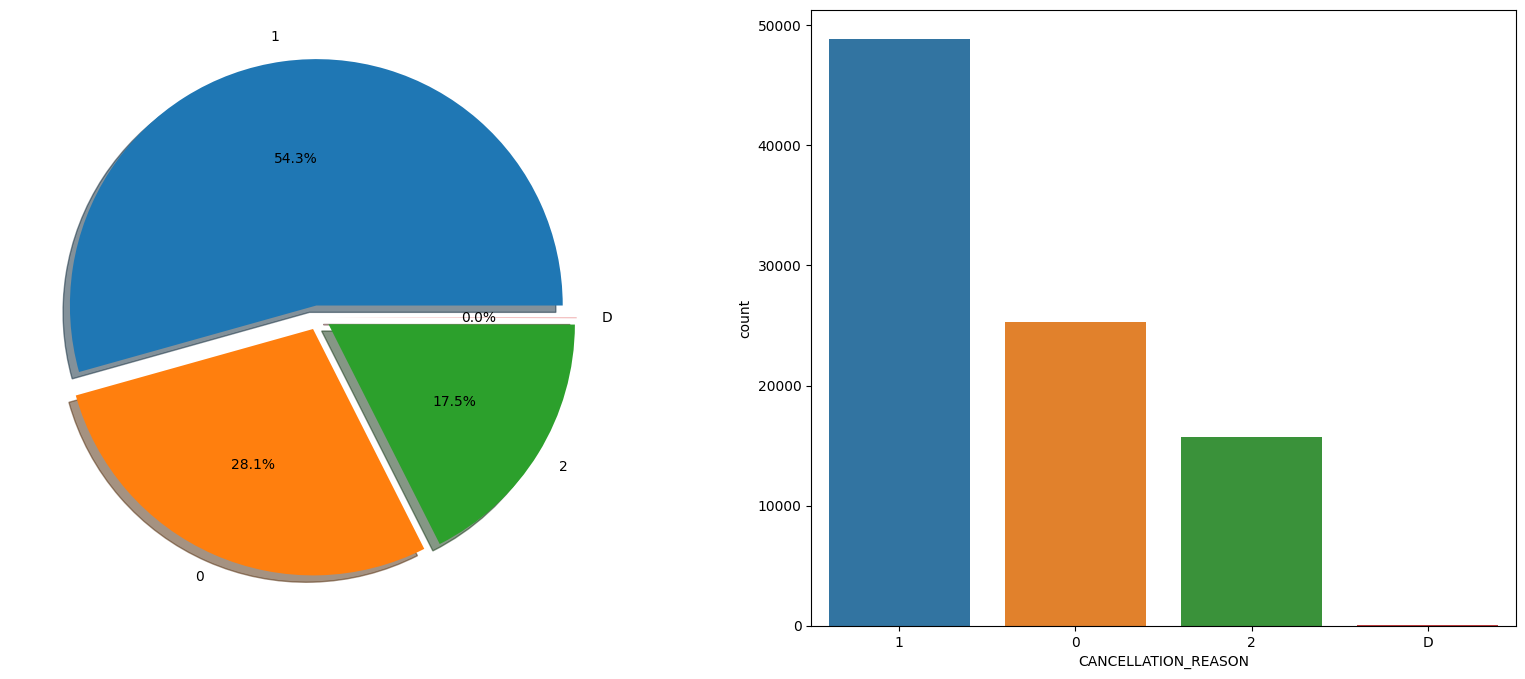

0 = carrier, 1 = weather, 2 = NAS


In [13]:
CancFlights = flights[(flights.Status == 4)]

f,ax=plt.subplots(1,2,figsize=(20,8))
CancFlights['CANCELLATION_REASON'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_ylabel('')
sns.countplot(x='CANCELLATION_REASON', order = CancFlights['CANCELLATION_REASON'].value_counts().index, data=CancFlights, ax=ax[1])
plt.show()


print('0 = carrier, 1 = weather, 2 = NAS')

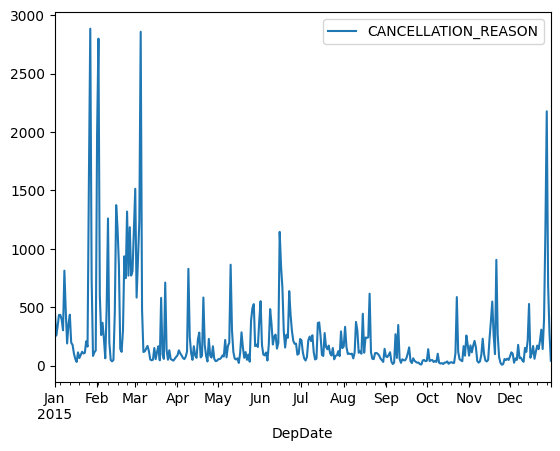

In [14]:
CancFlights[['DepDate','CANCELLATION_REASON']].groupby(['DepDate']).count().plot()
plt.show()

In [15]:
Delayedflights = flights[(flights.Status >= 1) &(flights.Status < 3)]

c:\Users\neelk\anaconda3\envs\cis545\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


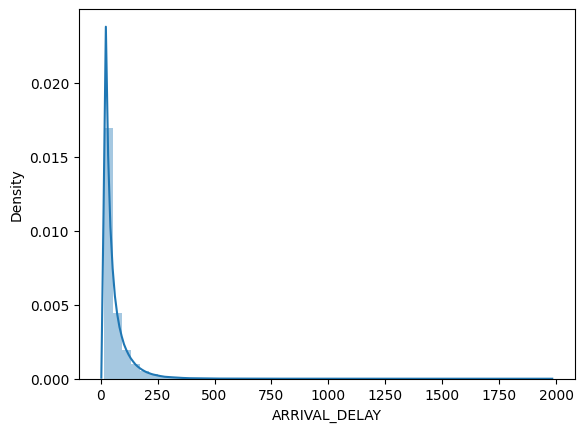

In [17]:
sns.distplot(Delayedflights['ARRIVAL_DELAY'])
plt.show()

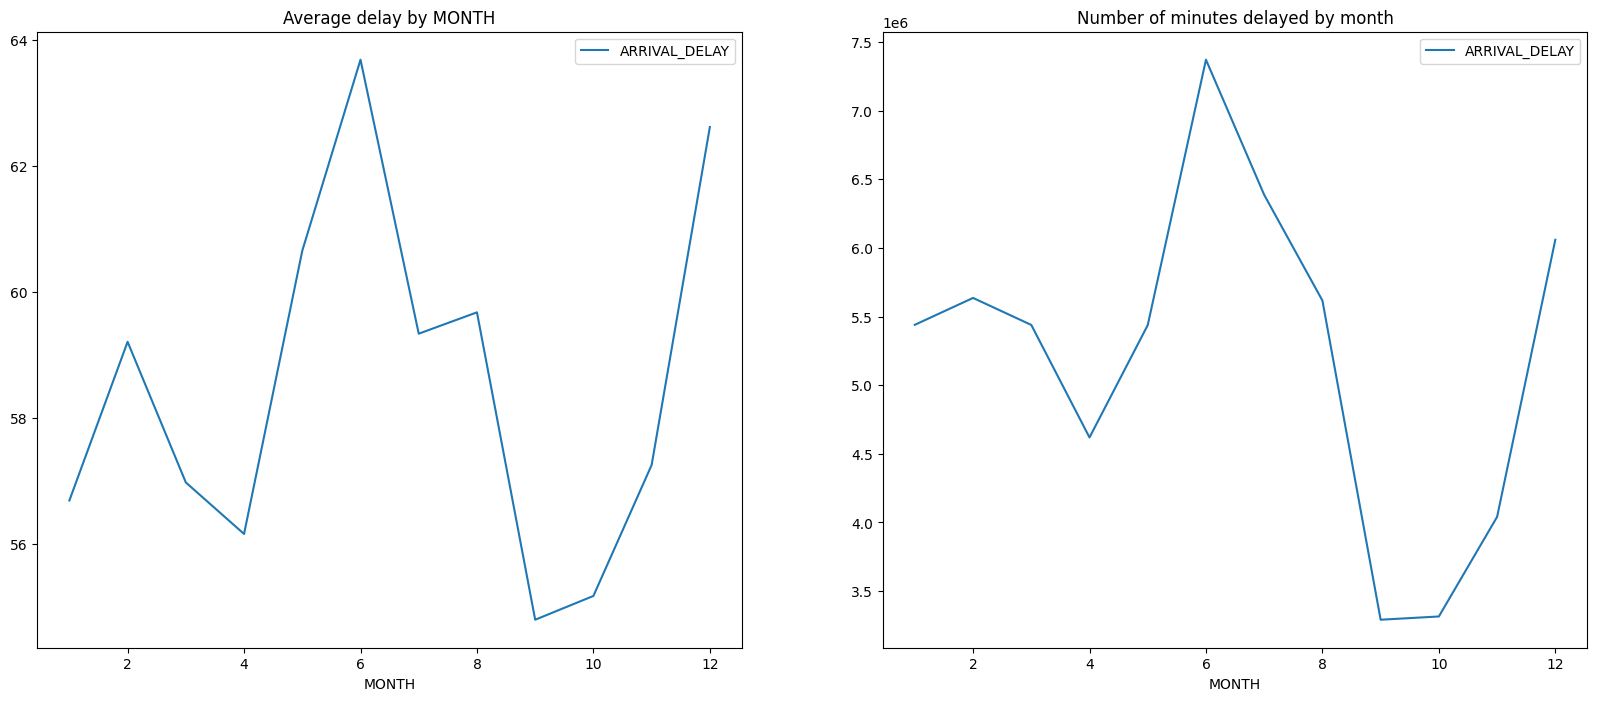

In [18]:
f,ax=plt.subplots(1,2,figsize=(20,8))
Delayedflights[['MONTH','ARRIVAL_DELAY']].groupby(['MONTH']).mean().plot(ax=ax[0])
ax[0].set_title('Average delay by MONTH')
Delayedflights[['MONTH','ARRIVAL_DELAY']].groupby(['MONTH']).sum().plot(ax=ax[1])
ax[1].set_title('Number of minutes delayed by month')
plt.show()

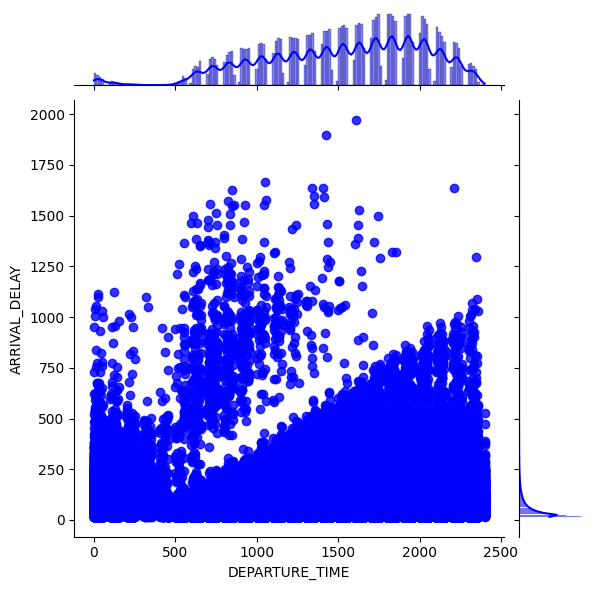

In [19]:
sns.jointplot(x='DEPARTURE_TIME',y='ARRIVAL_DELAY',data=Delayedflights,kind='reg', color='b',fit_reg = True)
plt.show()

c:\Users\neelk\anaconda3\envs\cis545\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


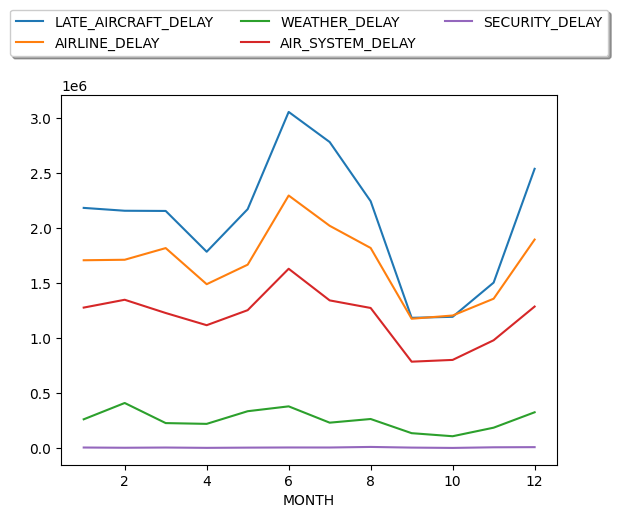

In [21]:
df2 = Delayedflights.filter(['MONTH','AIRLINE_DELAY','WEATHER_DELAY','AIR_SYSTEM_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY'], axis=1)
df2 = df2.groupby('MONTH')['LATE_AIRCRAFT_DELAY','AIRLINE_DELAY','WEATHER_DELAY','AIR_SYSTEM_DELAY','SECURITY_DELAY'].sum().plot()
df2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fancybox=True, shadow=True)
plt.show()

c:\Users\neelk\anaconda3\envs\cis545\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


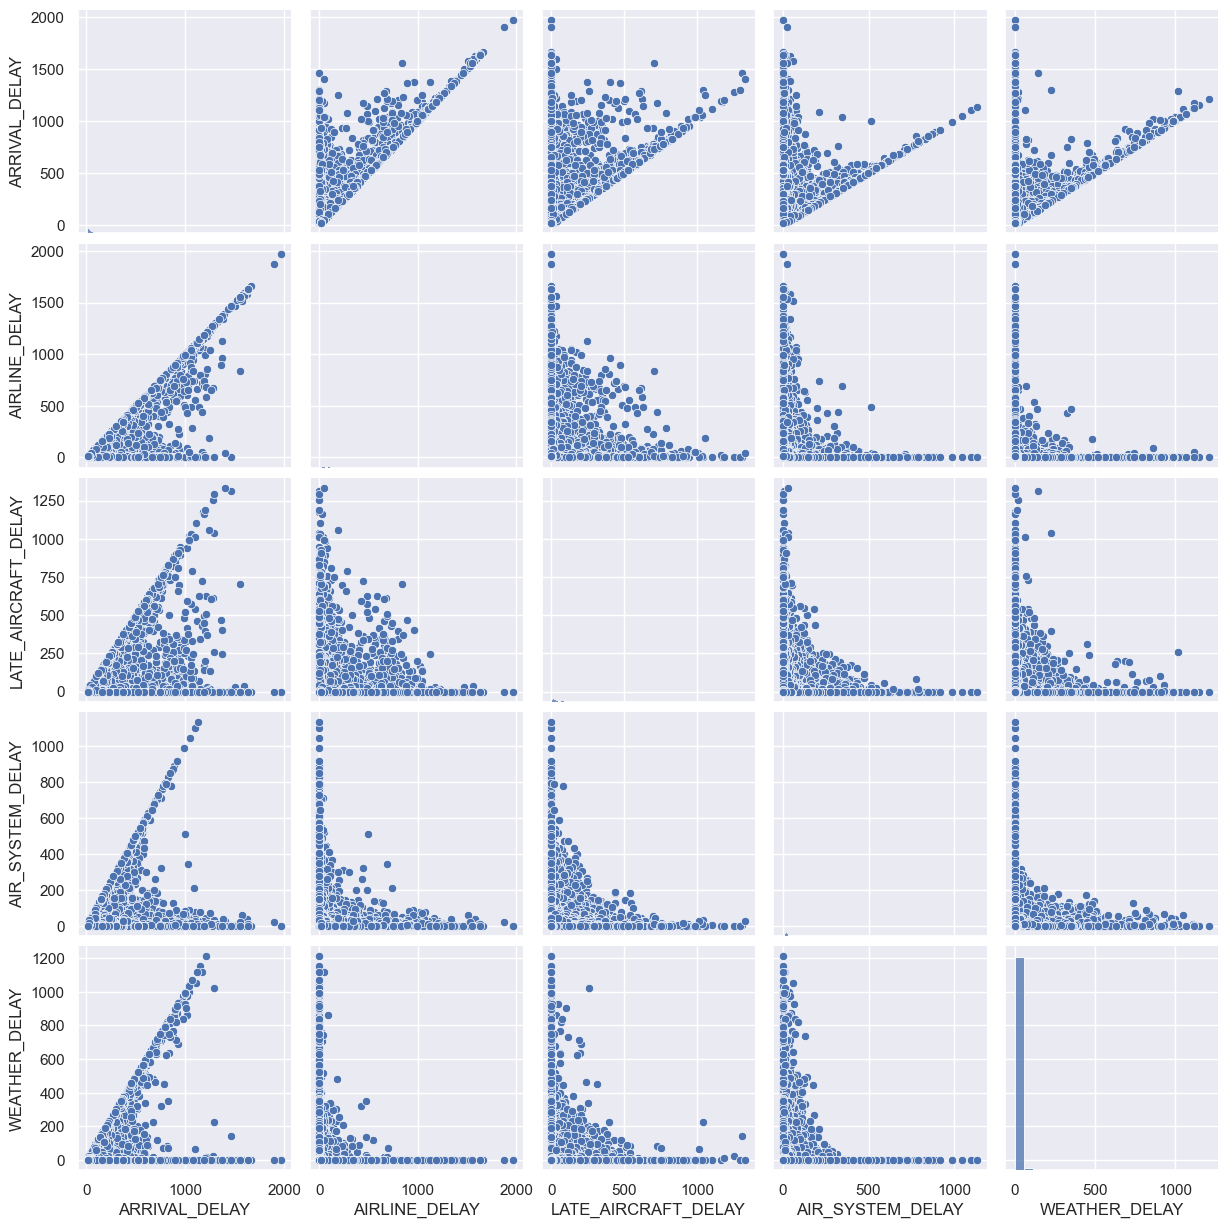

In [23]:
sns.set()
cols = ['ARRIVAL_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'AIR_SYSTEM_DELAY', 'WEATHER_DELAY']
sns.pairplot(Delayedflights[cols], size = 2.5)
plt.show()